# Assignment 1 (A): Building a Linear Regression Algorithm with Application to Used Car Price Prediction

## 1. Introduction <a id='section_1'></a>
In this part of the assignment, you will implement the linear regression learning algorithm and apply it to predicting prices of used cars. You are required to complete the lines between __START YOUR CODE HERE__ and __END YOUR CODE HERE__ (if applicable) and to execute each cell. Within each coding block, you are required to enter your code to replace `None` after the `=` sign (except otherwise stated). You are not allowed to use other libraries or files than those provided in this assignment. When entering your code, you should not change the names of variables, constants, and functions already listed.

**Contents**

* [1. Introduction](#section_1)
* [2. Used Car Dataset](#section_2)
    * [2.1. Data Description](#section_21)
    * [2.2. Data Loading](#section_22)
    * [2.3. Data Visualization](#section_23)
    * [2.4. One-hot Encoding](#section_24)
    * [2.5. Feature Scaling](#section_25)
        * [2.5.1. Min-max scaling](#section_251)
        * [2.5.2. Z-score scaling](#section_252)
        * [2.5.3. Training-testing dataset scaling](#section_253)   
    * [2.6. Train-test Split](#section_26)
    * [2.7. Data Processing](#section_27)
* [3. Linear Regression Learning Algorithm](#section_3)
    * [3.1. Hypothesis](#section_31)
    * [3.2. Cost Function](#section_32)
        * [3.2.1. Cost fucntion without regularization](#section_321)
        * [3.2.2. Cost function with regularization](#section_322)
    * [3.3. Gradient Descent](#section_33)
        * [3.3.1. Gradient descent without regularization](#section_331)
        * [3.3.2. Gradient descent with regularization](#section_332)
* [4. Optimization of Linear Regression Parameters](#section_4)
    * [4.1. Evaluation](#section_41)
    * [4.2. Learning Parameters](#section_42)
        * [4.2.1. Learning parameters without regularization](#section_421)
        * [4.2.2. Learning parameters with regularization](#section_422)
* [5. Prediction of Sampled Data](#section_5)
    * [5.1. MAPE Evaluation](#section_51)
    * [5.2. Prediction of Sampled Data](#section_52)
* [6. Linear Regression using scikit-learn](#section_6)
* [7. Marking Scheme and Submission](#section_7)
* [8. Summary](#section_8)

In [3]:
# You need to import the libraries required for this programming exercise.
# Scientific and vector computation for python
import numpy as np
# Data analysis and manipulation tool for python
import pandas as pd

# Plotting library
import matplotlib.pyplot as plt

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## 2. Used Car Dataset <a id='section_2'></a>
### 2.1. Data Description <a id='section_21'></a>
The dataset includes 5,996 records of used cars. Each record is described by 12 features as listed below (an additional unnamed ID (first column) is not listed). The text file named `raw_regression_data.csv` stores each record as one row having the feature values separated by commas.

| Feature | Description    
|:----:|:-           
| Location | Country of the car  
| Vehicle_Year | Age (in years) of the car
| Kilometers_Driven | Distance (in km) traveled by the used car to date
| Fuel_Type | Type of fuel used by the car
| Transmission | Type of the transmission
| Owner_Type | Type of the owner
| Seats | Number of seats in a used car
| Company | Vehicle make of the used car
| Fuel_Consumption(kmpl) | Fuel consumption per liter
| Engine(CC) | Swept volume (Displacement of one cylinder)
| Power(bhp) | Brake horse power (bhp) is the unit of power of an engine without any losses like heat and noise
| Price | Selling price of the used car

### 2.2. Data Loading <a id='section_22'></a>
In this section, you use the pandas functions `read_csv` to load the dataset, `info()` to generate a summary, `drop()` to drop the first unnamed feature. You can optionally use `head()` to display first several records.

In [9]:
# read in the data
raw_regression_data = pd.read_csv('used_car_us.csv')
raw_regression_data.drop('Unnamed: 0', axis=1, inplace=True)
raw_regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996 entries, 0 to 5995
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               5996 non-null   object 
 1   Vehicle_Year           5996 non-null   int64  
 2   Miles_Driven           5996 non-null   int64  
 3   Fuel_Type              5996 non-null   object 
 4   Transmission           5996 non-null   object 
 5   Owner_Type             5996 non-null   object 
 6   Seats                  5996 non-null   float64
 7   Company                5996 non-null   object 
 8   Fuel_Consumption(mpg)  5996 non-null   int64  
 9   Engine(CC)             5996 non-null   float64
 10  Power(bhp)             5996 non-null   float64
 11  Price                  5996 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 562.2+ KB


In [14]:
print(raw_regression_data.head())
#raw_regression_data.columns
#for num,title in enumerate(raw_regression_data.columns):
    #print(num,title)

      Location  Vehicle_Year  Miles_Driven Fuel_Type           Transmission  \
0    Charlotte            10         44741   Ethanol              Automatic   
1  Los_Angeles             5         25477  Gasoline              Automatic   
2      Chicago             9         28584    Diesel              Automatic   
3      Chicago             8         54062  Gasoline              Automatic   
4      Seattle             7         25272  Gasoline  Continuously_Variable   

  Owner_Type  Seats  Company  Fuel_Consumption(mpg)  Engine(CC)  Power(bhp)  \
0      First    5.0       GM                     63       998.0       58.16   
1      First    5.0  HYUNDAI                     46      1582.0      126.20   
2      First    5.0    HONDA                     43      1199.0       88.70   
3      First    7.0       GM                     49      1248.0       88.76   
4     Second    5.0     AUDI                     36      1968.0      140.80   

   Price  
0   3500  
1  25000  
2   9000  
3  120

### 2.3. Data Visualization <a id='section_23'></a>
You can visualize the distribution of each feature by executing the following code block. All numeric (continuous) features are visualized by blue bars, whereas all categorical features are visualized by red bars.

Attribute Number: 12


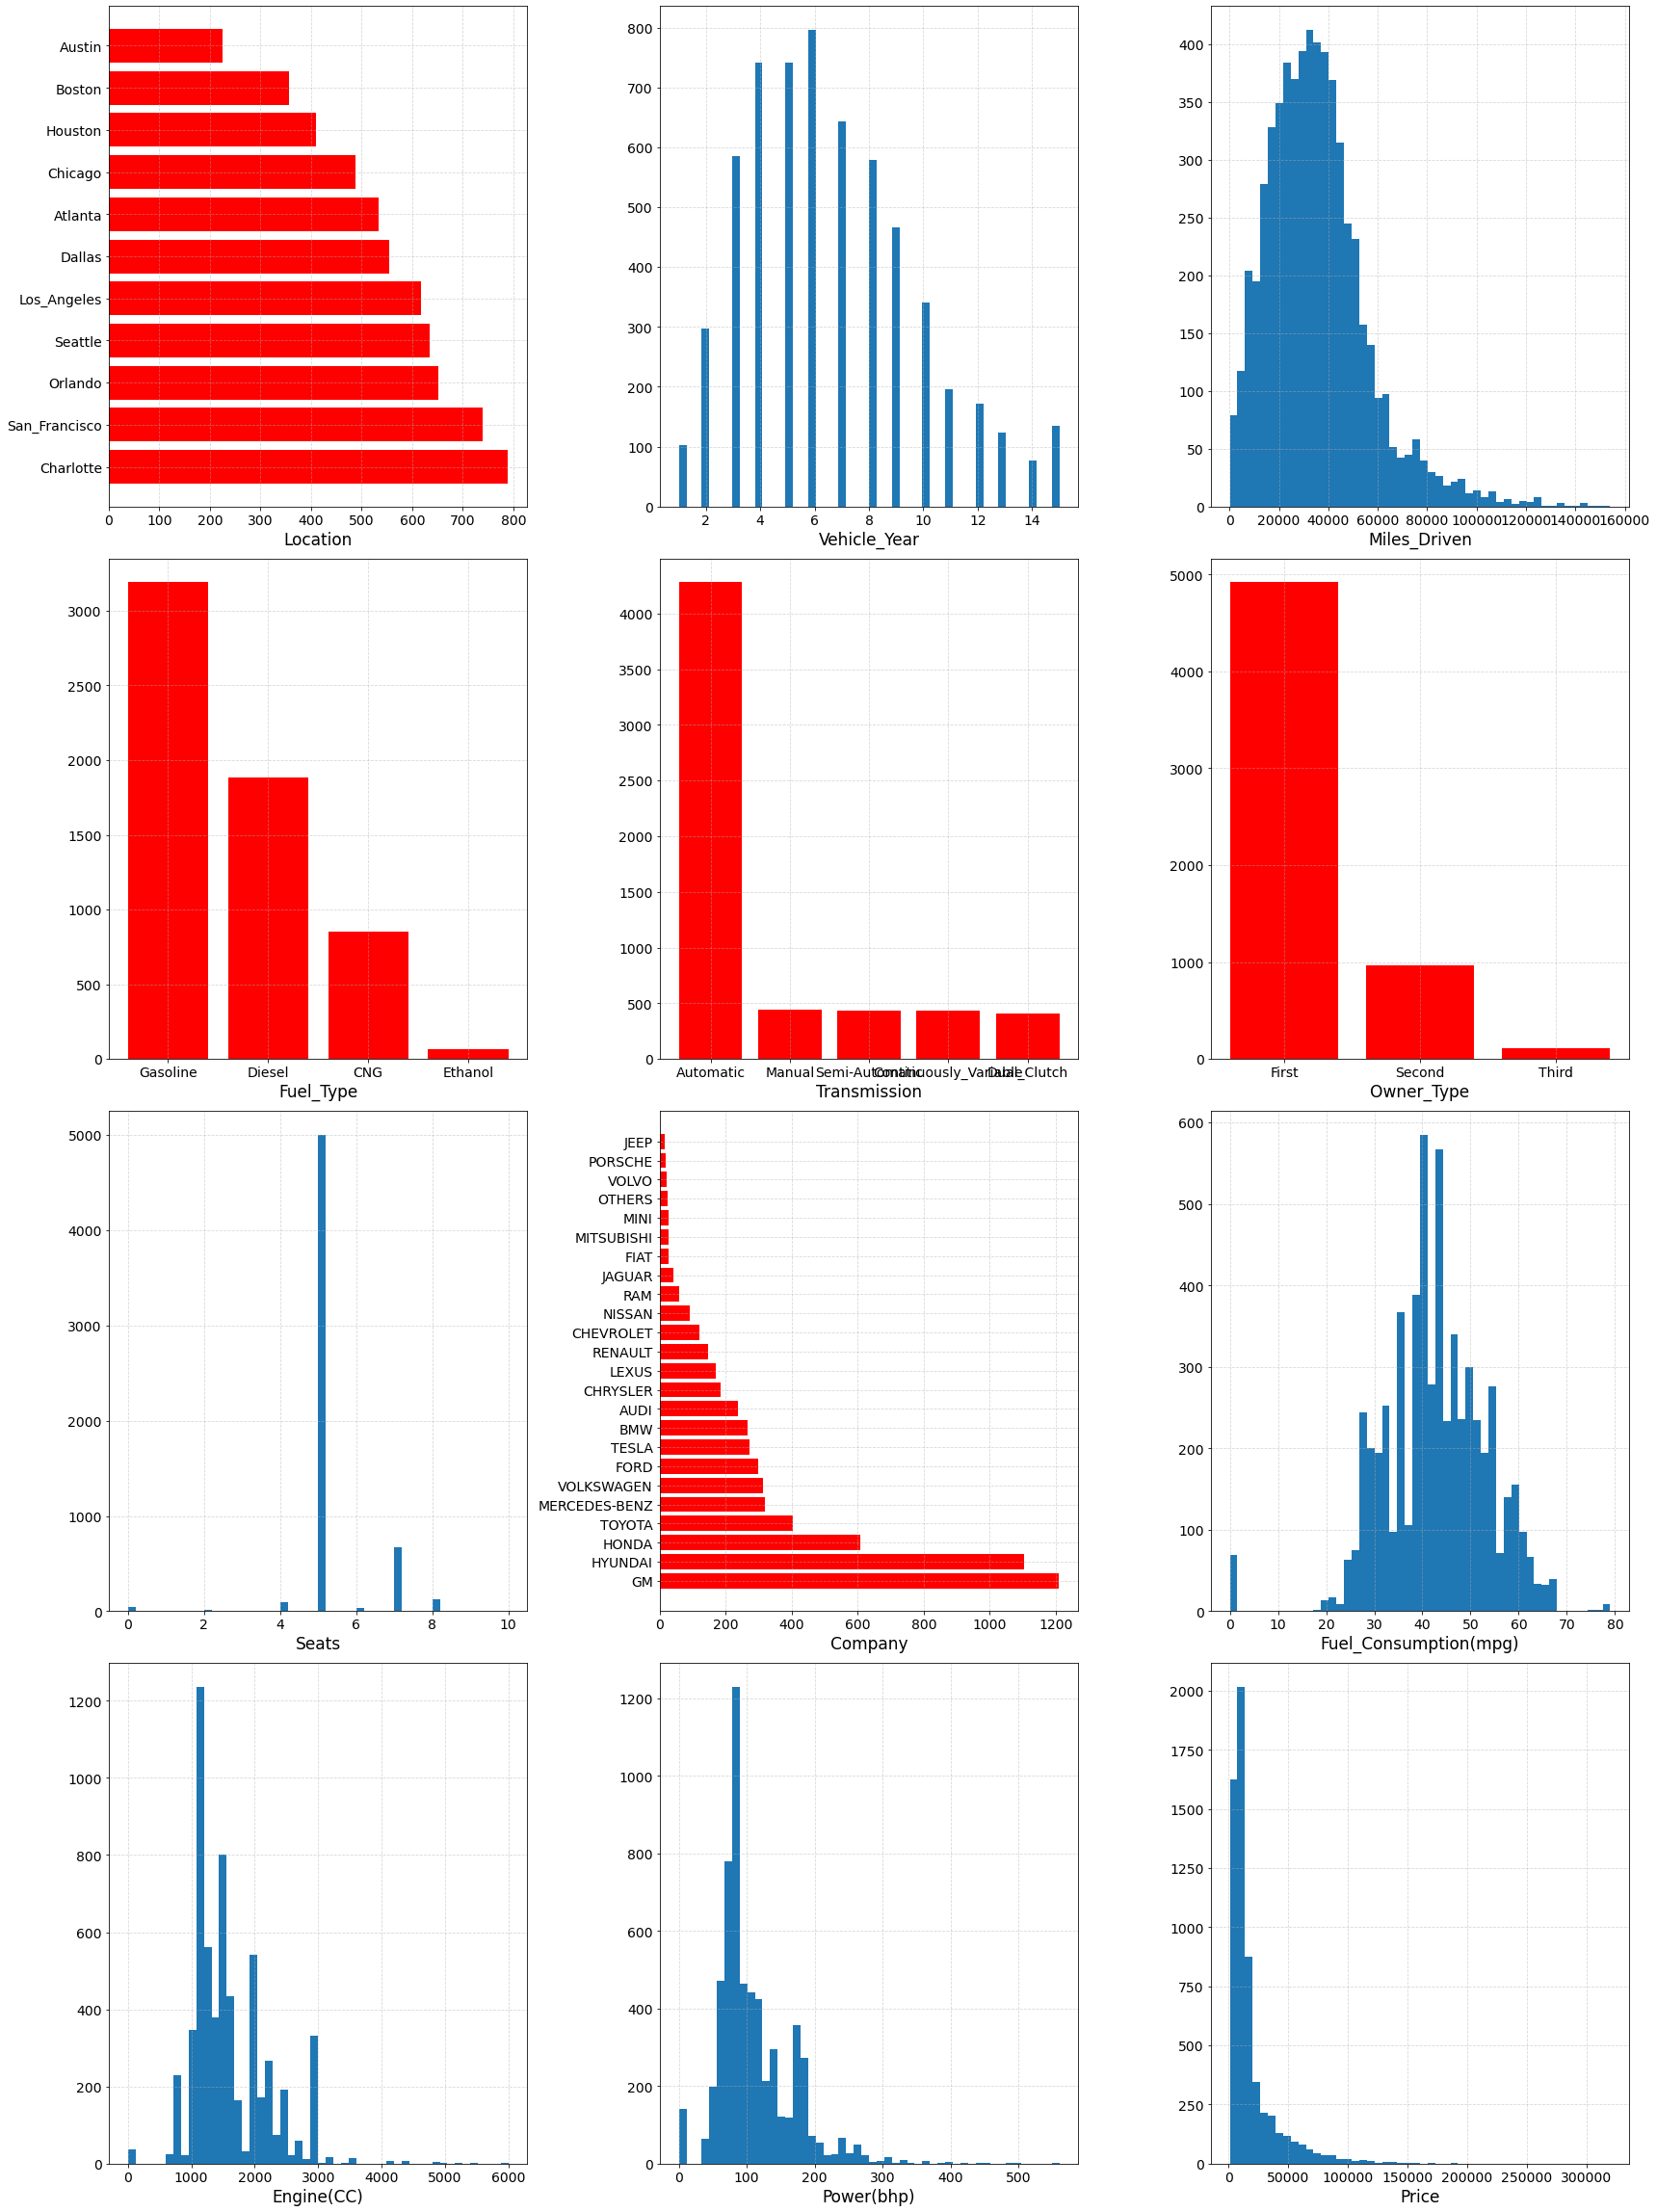

In [6]:
attribute_number = len(raw_regression_data.columns)
print("Attribute Number: {}".format(attribute_number))

# subplots
fig = plt.figure(figsize=(24, 32))
ax = fig.subplots(attribute_number//3,3)
# iterations
for num, title in enumerate(raw_regression_data.columns):
    idx = num//3 # divided with no remainder
    idy = num%3  # remainder
    if raw_regression_data[title].dtype in ['object']:
        value_count_dict = raw_regression_data[title].value_counts().to_dict()
        keys = list(value_count_dict.keys())
        values = list(value_count_dict.values())
        if len(raw_regression_data[title].unique().tolist()) < 8:
            ax[idx, idy].bar(keys, values, color='r')
        else:
            ax[idx, idy].barh(keys, values, color='r')
    else:
        ax[idx, idy].hist(raw_regression_data[title].values, bins=50);

    # set title with attribute
    ax[idx, idy].set_xlabel(title, fontsize=17)
    # set grid width
    ax[idx, idy].grid(linestyle='--', alpha=0.5)
    # font size of ticks
    ax[idx, idy].tick_params(labelsize=14)
plt.tight_layout()

### 2.4. One-hot Encoding <a id='section_24'></a>

All categorial data (e.g., fuel type) must be transformed into numerical indices. You will use the function `get_dummies()` from the Pandas library to perform this one-hot encoding.

In [7]:
# one-hot encoding
regression_data = pd.get_dummies(raw_regression_data)
print('Before using get_dummies\nFuel_Type: {}'.format(raw_regression_data.loc[0,'Fuel_Type']))

print('\nAfter using get_dummies:')
print('Fuel_Type_Ethanol:', regression_data.loc[0, 'Fuel_Type_Ethanol'])
print('Fuel_Type_Gasoline:', regression_data.loc[0, 'Fuel_Type_Gasoline'])
print('Fuel_Type_Diesel:', regression_data.loc[0, 'Fuel_Type_Diesel'])
print('Fuel_Type_CNG:', regression_data.loc[0, 'Fuel_Type_CNG'])

Before using get_dummies
Fuel_Type: Ethanol

After using get_dummies:
Fuel_Type_Ethanol: 1
Fuel_Type_Gasoline: 0
Fuel_Type_Diesel: 0
Fuel_Type_CNG: 0


### 2.5. Feature Scaling <a id='section_25'></a>
You will implement two feature scaling techniques, `min_max_scaler()` and `z_score_scaler()`, to normalize the input values to ensure efficient convergence of the algorithm.

#### 2.5.1. Min-max scaling <a id='section_251'> </a>
**Task 1:** <a id='task_1'></a>
The min-max scaling equation is defined as follows:

$$\text{min_max_scaler}(x_i) = \frac{x_i - x_{min}}{x_{max}-x_{min}} \ . \tag{1}$$

In the function `min_max_scaler()`, if $x_{min}$ and $x_{max}$ are not given as inputs, the minimal and maximal values per features can be found by using `np.min()` and `np.max()` functions. To compute the scaled `new_x`, you need to use [`np.divide()`](https://numpy.org/doc/stable/reference/generated/numpy.divide.html) by setting its first and second parameters to numerator and denominator of the equation above. To avoid the problem of division by zero, you need to set the `out` parameter of  [`np.divide()`](https://numpy.org/doc/stable/reference/generated/numpy.divide.html) by using [`np.zeros_like()`](https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html) (enter the numerator as its parameter). You also need to set the `where` parameter to indicate the condition, e.g., if the denominator is named `denom`, the condition is `denom!=0`.

In [15]:
# Min-max range normalization
def min_max_scaler(x, x_min=None, x_max=None):
    """
        feature scaling with min-max range normalization
        x : arrary_like
            dataset with several features
        x_min : float
            given maximal value of features. If this input are given, the dataset will be scaled according to this value.
            If not, this value will be calculated by the data themselves.
        x_max : float
            given minimal value of features. If this input are given, the dataset will be scaled according to this value.
    """

    new_x = np.zeros_like(x) # create a new matrix "new_x" with the shape as the input matrix 'x'

    # Task 1:
    # ====================== START YOUR CODE HERE ======================
    # check if the necessary minimum and maximum are given
    # 1. minimum value per feature element (column) (1 line code)
    # 2. maximum value per feature element (column) (1 line code)
    # 3. division considering zero denominator (1 line code)
    if x_min is None or x_max is None: # Please do not change this line !!!
        x_min = np.min(x,axis=0)
        x_max = np.max(x,axis=0)
    x_range = x_max-x_min
    new_x = np.divide((x -x_min), x_range, out=np.zeros_like(x), where=x_range!=0)
    # ====================== END YOUR CODE HERE ========================

    return new_x, x_min, x_max

#### Inverse min-max scaling
To recover the original data, the following function `inverse_min_max_scaler()` can be used.

In [16]:
# inverse min-max scaling
def inverse_min_max_scaler(scaled_x, parameters):
    """
        inverse feature scaling of the min-max normalization
    """
    x_min, x_max = parameters
    return scaled_x * (x_max-x_min) + x_min

**[Test Block 1]:** Test code for function `min_max_scaler()`. First 10 data items are extracted from dataset. Only two features are of interest.

In [17]:
# features of interest (two features)
demo_features = ['Vehicle_Year', 'Miles_Driven']
# sample the first ten data items
data_sample = regression_data[demo_features].head(10).values.astype('float')
# implemented function
scaled_sample, sample_min, sample_max = min_max_scaler(data_sample)

print('Minimal Value: {}'.format(sample_min))
print('Maximal Value: {}'.format(sample_max))
# you can use function "np.allclose" to compare two floats with small differences.
if np.allclose(sample_min, [4.0, 22370.0]) and np.allclose(sample_max, [10.0, 54062.0]) \
   and np.allclose(scaled_sample[[0, -1],1], [0.70588235, 0.58690196]):
    print('Your answers are correct!')
else:
    print('*** Error! Your answers are not correct. Please correct your code. ***')

Minimal Value: [4.000e+00 2.237e+04]
Maximal Value: [1.0000e+01 5.4062e+04]
Your answers are correct!


#### 2.5.2. Z-score scaling <a id='section_252'> </a>
**Task 2:** <a id='task_2'></a>
The z-score scaling equation is defined as follows:

$$\text{z_score_scaler}(x_i) = \frac{x_i - \bar{x}_{i}}{s_{x_i}} \ .$$

The function `z_score_scaler()` transfroms the original data distribution to a normal distribution with zero mean and one standard variation. You should use [`np.mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [`np.std()`](https://numpy.org/doc/stable/reference/generated/numpy.std.html) to get mean value $\bar{x}_i$ and standard deviation $s_{x_i}$ respectively. Then, you should use [`np.divide()`](https://numpy.org/doc/stable/reference/generated/numpy.divide.html) to compute the scaled `new_x` and set the `out` parameter using [`np.zeros_like()`](https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html) (enter the numerator as its parameter) and set the `where` parameter to indicate the condition, e.g., if the denominator is named `denom`, the condition is `denom!=0`.

In [18]:
# Z-score normalization
def z_score_scaler(x, x_mean=None, x_std=None):
    """
        feature scaling with Z-score normalization (standarlization)
    """

    new_x = np.zeros_like(x) # create a new matrix "new_x" with the shape as the input matrix 'x'

    # Task 2:
    # ====================== START YOUR CODE HERE ======================
    # check if the necessary mean and standard variation values is given
    # 1. mean value per feature element (column) (1 line code)
    # 2. standard deviation per feature element (column) (1 line code)
    # 3. division considering zero denominator (1 line code)
    if x_mean is None or x_std is None: # Please do not change this line !!!
        x_mean = np.mean(x,axis=0)
        x_std = np.std(x,axis=0)
    new_x = np.divide((x-x_mean), x_std, out=np.zeros_like(x), where=x_std!=0)
    # ====================== END YOUR CODE HERE ======================

    return new_x, x_mean, x_std

#### Inverse z-score scaling <a id='section_254'> </a>
To recover the original data, you can use the `inverse_z_score_scaler()` function.

In [22]:
# inverse z-score scaler
def inverse_z_score_scaler(scaled_x, parameters):
    """
        inverse feature scaling with Z-score normalization (standarlization)
    """
    x_mean, x_std = parameters
    return scaled_x * x_std + x_mean

**[Test Block 2]:** Test code for function `z_score_scaler()`. First 10 data items are extracted from dataset. Only two features are of interest.

In [23]:
# target data
demo_features = ['Vehicle_Year', 'Miles_Driven']
# sample the first ten data items
data_sample = regression_data[demo_features].head(10).values
scaled_sample, sample_mean, sample_std = z_score_scaler(data_sample.astype('float'))

print('Mean Value: {}'.format(sample_mean))
print('Standard Variation: {}'.format(sample_std))
# you can use function "np.allclose" to compare two floats with small differences.
if np.allclose(sample_mean, [7.3, 61503.1]) and np.allclose(sample_std, [1.67630546, 18346.15853224]) \
    and np.allclose(scaled_sample[[0, -1],1], [0.57215793, 0.24140749]):
    print('Your answers are correct!')
else:
    print('*** Error! Your answers are not correct. Please correct your code. ***')

Mean Value: [7.30000e+00 3.82179e+04]
Standard Variation: [1.67630546e+00 1.14004895e+04]
*** Error! Your answers are not correct. Please correct your code. ***


In [25]:
# can not find Kilometers_Driven feature in the data

#### 2.5.3. Training-testing dataset scaling <a id='section_253'></a>
You will execute the following code to scale the feature values using a selected method.

In [26]:
# feature scaling
def scale_feature(x_train, x_test, method='min_max'):
    """
        sacling the features in training and testing dataset
        only with distribution of training dataset.
    """

    scaled_train_data = np.zeros_like(x_train)
    scaled_test_data = np.zeros_like(x_test)

    if method == 'min_max':
        scaled_train_data, train_x_min, train_x_max = min_max_scaler(x_train)
        scaled_test_data, train_x_min, train_x_max = min_max_scaler(x_test, train_x_min, train_x_max)
        parameters = (train_x_min, train_x_max)
    elif method == 'z_score':
        scaled_train_data, train_x_mean, train_x_std = z_score_scaler(x_train)
        scaled_test_data, train_x_mean, train_x_std = z_score_scaler(x_test, train_x_mean, train_x_std)
        parameters = (train_x_mean, train_x_std)
    else:
        raise ValueError("The mentioned method have not been implemented yet, \
                         please select one from min-max and z-score normalization")

    return scaled_train_data, scaled_test_data, parameters

To recover the original data, you can use the `inverse_scale_feature()` function using a selected method.

In [27]:
# inverse feature scaling
def inverse_scale_feature(scaled_x, parameters, method='min_max'):
    """
        inverse sacling the features in training and testing dataset
        only with distribution of training dataset.
    """

    data_x = np.zeros_like(scaled_x)

    if method == 'min_max':
        data_x = inverse_min_max_scaler(scaled_x, parameters)
    elif method == 'z_score':
        data_x = inverse_z_score_scaler(scaled_x, parameters)
    else:
        raise ValueError("The mentioned method have not been implemented yet, \
                        please select one from min-max and z-score normalization")

    return data_x

#### 2.6. Train-test Split <a id='section_26'></a>
**Task 3:** <a id='task_3'></a>

You will implement `train_test_split()` to split the original dataset into training and testing sets. To select the m data items randomly, you can use `np.random.permutation()` to get a random permutation of m indices.

In [28]:
# train-test dataset split
def train_test_split(x, y, train_ratio=0.8):
    """
        Separate the dataset into training and testing dataset for learning and evaluating the model
        of linear regression.

        Parameters
        ----------
        x : array_like, the input dataset of shape (m, n+1).
        y : array_like, value at given features. A vector of shape (m, 1).

        train_size: float, the percetage of training dataset (between 0 and 1)

        Returns
        -------
        x_train : array_like, matrix of the training dataset.
        x_test : array_like, matrix of the testing dataset.
        y_train : array_like, value at given features in training datset. A vector of shape (m, 1).
        y_test : array_like, value at given features in testing dataset. A vector of shape (m, 1).
    """

    m = x.shape[0]

    # Task 3:
    # ====================== START YOUR CODE HERE ======================
    # your task is:
    # 1. shuffle indices with random order (1 line code)
    # 2. multiply train_ratio and the size of dataset; then cast the result as integer (1 line code)
    row_indices = np.random.permutation(m)
    training_set_num = int(train_ratio*m)
    # ====================== END YOUR CODE HERE ======================

    # Create a Training Set
    x_train = x[row_indices[:training_set_num],:]
    y_train = y[row_indices[:training_set_num],:]

    # Create a Test Set
    x_test = x[row_indices[training_set_num:],:]
    y_test = y[row_indices[training_set_num:],:]

    return x_train, x_test, y_train, y_test

**[Test Block 3]:** Test code for function `train_test_split()`. First 100 data items are extracted from dataset. $85\%$ of dataset will be extracted as training dataset, while the rest is in testing set.

In [29]:
# sample the first ten data items
label_name = 'Price'
feature_name = list(regression_data.columns)
feature_name.remove(label_name)

data_sample = regression_data.head(100)
data_sample_x = data_sample.loc[:, feature_name].values
data_sample_y = np.atleast_2d(data_sample.loc[:, label_name].values).T

(x_sample_train, x_sample_test, \
y_sample_train, y_sample_test)= train_test_split(data_sample_x, data_sample_y, train_ratio=0.85)

# number of data items of whole dataset, training set, and testing set
data_size = data_sample.shape[0]
train_size = x_sample_train.shape[0]
test_size = x_sample_test.shape[0]

if train_size == 0.85*data_size and test_size == 0.15*data_size:
    print('Your answers are correct!')
else:
    print('*** Error! Your answers are not correct. Please correct your code. ***')

Your answers are correct!


#### 2.7. Data Processing <a id='section_27'></a>
Now, you will use your implemented functions `scale_feature()` and `train_test_split()` to process the original dataset.

**Task 4:**<a id='task_4'></a>
* Separate the dataset into training (85%) and testing (15%) dataset with `train_test_split()` (1 line code)
* Processing training and testing data with feature scaling methods with `scale_feature()`, please use **Min-max** scaler for further operations. (1 line code)

In [34]:
from sklearn.model_selection import train_test_split

In [56]:
# Here you should do necessary operations for the regression data.
data = regression_data.loc[:, list(regression_data.columns)[1:-1]]
data.drop('Price', axis=1, inplace=True)
data_x = data.values
data_y = np.atleast_2d(regression_data['Price'].values).T

# Task 4:
# ====================== START YOUR CODE HERE ======================
# your task here is:
# 1. train test split (1 line code)
# 2. feature scaling for training and testing dataset (1 line code)
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.15, random_state=1)
x_train, x_test, scaling_parameters = scale_feature(x_train, x_test, method='min_max')
#x_train, x_min, x_max = min_max_scaler(x_train)
#x_test, _, _ = min_max_scaler(x_test, x_min, x_max)
# ====================== END YOUR CODE HERE ========================

x_train = np.concatenate([np.ones((x_train.shape[0], 1)), x_train], axis=1)
x_test = np.concatenate([np.ones((x_test.shape[0], 1)), x_test], axis=1)
y_train = np.log(y_train)
y_test = np.log(y_test)

## 3. Linear Regression Learning Algorithm <a id='section_3'></a>
### 3.1. Hypothesis <a id='section_31'></a>
The linear regression hypothesis is represented as follows:

$$ h_\theta(x) = \theta^Tx \ . \tag{3}$$

**Task 5:** <a id='task_5'></a>

You will implement the linear regression hypothesis function as in `hypothesis()`. You can use `np.matmul()` or `np.dot()` to perform matrix multiplication.

In [57]:
# hypothesis function with linear model
def hypothesis(theta, x):
    """
        Hypothesis function with linear model.
        with parameters theta for linear regression and data points in x.

        Parameters
        ----------
        theta: array_like
            The parameters for the regression function. This is a vector of
            shape (n+1, 1).

        x : array_like
            The input dataset of shape (m, n+1), where m is the number of examples,
            and n is the number of features. Assume that a vector of one's already
            appended to the features so the n+1 columns are given.

        Returns
        -------
        h : array_like
            Predicted values at given features. A vector of shape (m, 1).
    """

    h = np.zeros((x.shape[0],))

    # task 5:
    # ====================== START YOUR CODE HERE ======================
    # multiplication between matrix x and vector theta (1 line code)
    h = np.dot(x,theta)
    # ====================== END YOUR CODE HERE ======================

    return h

**[Test Block 4]:** Test code for function `hypothesis()`.

In [58]:
demo_theta = np.array([[1, 2, 3]]).T
print('Shape of theta: {}'.format(demo_theta.shape))
demo_x = np.array([[1, 2, 3], [4, 5, 6]])
print('Shape of x: {}'.format(demo_x.shape))

h = hypothesis(demo_theta, demo_x)
print("Hypothesis value: {}".format(h))

if np.allclose(h, [[14], [32]]):
    print('Your answers are correct!')
else:
    print('*** Error! Your answers are not correct. Please correct your code. ***')

Shape of theta: (3, 1)
Shape of x: (2, 3)
Hypothesis value: [[14]
 [32]]
Your answers are correct!


### 3.2. Cost Function <a id='section_32'></a>
#### 3.2.1. Cost fucntion without regularization <a id='section_321'></a>
The objective of linear regression (without the regularization term) is to search for the optimal parameters $\theta$ to minimize this cost function:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 \tag{4}$$

**Task 6:** <a id='task_6'></a> In this task, you will:
1. compute the hypothesis value `hyp` with your implemented function `hypothesis()` (1 line)
2. compute the error between `hyp` and input $y$ with function `np.substract()` (1 line)
3. compute the squared error with `np.power()` (1 line)
4. compute the cost value $J(\theta)$ with `np.sum()` (1 line)

In [59]:
# Cost function without regularization term
def cost_computation(theta, x, y):
    """
    Cost function for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in x and y.

    Parameters
    ----------
    theta : array_like
        The parameters for the regression function. This is a vector of
        shape (n+1, 1).

    x : array_like
        The input dataset of shape (m, n+1), where m is the number of examples,
        and n is the number of features. Assume a vector of one's already
        appended to the features so the n+1 columns are given.

    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, 1).

    Returns
    -------
    cost : float
        The value of cost function.

    Instructions
    ------------
    Compute the cost of a particular choice of theta and return it.
    """

    m = x.shape[0]
    cost = .0

    # Task 6:
    # ====================== START YOUR CODE HERE ======================
    # your task is:
    # 1. compute the hypothesis value (1 line code)
    # 2. compute the error between hypothesis and y with np.substract (1 line code)
    # 3. compute the squared error (np.power) (1 line code)
    # 4. compute the cost value (np.sum) (1 line code)
    hyp = np.dot(x,theta)
    errors = np.subtract(hyp,y)
    squared_errors = np.power(errors,2)
    cost = np.sum(squared_errors) / (2*m)
    # ====================== END YOUR CODE HERE ======================

    return cost

**[Test Block 5]:** Test code for function `cost_computation()`.

In [60]:
# small demo for verification
demo_theta = np.array([1, 2, 3], ndmin=2).T # shape (3, 1)
demo_x = np.array([1, 2, 3], ndmin=2)
demo_y = 20

cost_value = cost_computation(demo_theta, demo_x, demo_y)
print('Cost value: {}'.format(cost_value))

if cost_value == 18.0:
    print('Your answers are correct!')
else:
    print('*** Error! Your answers are not correct. Please correct your code. ***')

Cost value: 18.0
Your answers are correct!


#### 3.2.2. Cost function with regularization <a id='section_322'></a>
Adding a regularization term, the objective of linear regression has a slightly different cost function than (4):

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 + \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2 \ . \tag{5}$$

Equation (5) uses a hyperparameter $\lambda$ (a positive number) that controls the values of parameters $\theta$ while the cost is being minimized. The higher the value of $\lambda$ is, the lower the values of parameters $\theta$ have to be in order to minimize the cost (and vice versa).

**Task 7:** <a id='task_7'></a> Your task is to:
1. compute the hypothesis value `hyp` with your implemented function `hypothesis()` (1 line)
2. compute the error between hypothesis and y with `np.substract()` (1 line)
3. compute the squared error (`np.power()`) (1 line)
4. compute the cost value (`np.sum()`) (1 line)
5. compute the regularized cost value with `np.dot()` or `np.matmul()`. Note that the output of `np.dot()` is an `np.ndarry` (shape=(1,1)). To obtain a scalar value, you need to use the method `item()`. (1 line)

In [40]:
# cost function with regularization term
def regularized_cost_computation(theta, x, y, lamda):
    """
    Cost function for linear regression with a regularization term. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in x and y.

    Parameters
    ----------
    theta : array_like
        The parameters for the regression function. This is a vector of
        shape (n+1, 1).

    x : array_like
        The input dataset of shape (m, n+1), where m is the number of examples,
        and n is the number of features. Assume that a vector of one's already
        appended to the features so n+1 columns are given.

    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, 1).

    lamda : float
        Hyperparameter for regularization term.

    Returns
    -------
    cost : float
        The value of cost function.

    Instructions
    ------------
    Compute the cost of a particular choice of theta and return it.
    """

    m = x.shape[0]
    cost = .0

    # Task 7:
    # ====================== START YOUR CODE HERE ======================
    # 1. compute the hypothesis value (1 line code)
    # 2. compute the error between hypothesis and y with np.substract "errors" (1 line code)
    # 3. compute the squared error "squared_errors" (np.power) (1 line code)
    # 4. compute the cost value "error_cost" (np.sum) (1 line code)
    # 5. compute the regularization cost value "regularization_cost" (1 line code)
    hyp = np.dot(x,theta)
    errors = np.subtract(hyp,y)
    squared_errors = np.power(errors,2)
    error_cost = np.sum(squared_errors)/(2*m)
    regularization_cost = (lamda / (2*m)) * np.sum(np.power(theta[1:],2))
    # get data value from 1X1 np.ndarray
    # ====================== END YOUR CODE HERE ======================
    cost = error_cost + regularization_cost

    return cost

**[Test Block 6]:** Test code for function `regularized_cost_computation()`.

In [41]:
# small demo for verification
demo_theta = np.array([1, 2, 3], ndmin=2).T # shape (3, 1)
demo_x = np.array([1, 2, 3], ndmin=2)
demo_y = 20
lamda = 1

cost_value = regularized_cost_computation(demo_theta, demo_x, demo_y, lamda)
print('Cost value: {}'.format(cost_value))

if cost_value == 24.5:
    print('Your answers are correct!')
else:
    print('*** Error! Your answers are not correct. Please correct your code. ***')

Cost value: 24.5
Your answers are correct!


### 3.3. Gradient Descent <a id='section_33'></a>
Next, you will implement the gradient descent algorithm to find the $\theta$ of the optimal linear regression hypothesis (or model).

#### 3.3.1. Gradient descent without regularization <a id='section_331'></a>
The equation to compute for parameter update (without using regularization) is:

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j \in \{1, 2, \dots, n\}. \tag{6}$$

The gradient descent algorithm iteratively reduces the cost $J(\theta)$ by find parameters $\theta_j$ by searching among all values of available features.

**Task 8:** <a id='task_8'></a> In this task, you will:

 1. compute the hypothesis value with your implemented function `hypothesis()` saved in "hyp" (1 line)
 2. compute the difference between "hyp" and input $y$ with function `np.substract()`, then save it in "hyp_diff" (1 line code)
 3. compute the element-wise multiplication between "hyp_diff" and the $j$-th column of $x$ with function `np.multiply()`, then saved into "error_list" (1 line)
 4. compute the sum of errors with `np.sum()`, saved into "total_error" (1 line)
 5. update each element of theta according to the equation (6). (1 line)

In [48]:
# update theta with gradient descent (one iteration)
def gradient_descent(theta, x, y, alpha):
    """
    Performs gradient descent to learn `theta`. Updates theta with only one iteration,
    i.e., one gradient step with learning rate `alpha`.

    Parameters
    ----------
    theta : array_like
        Initial values for the linear regression parameters.
        A vector of shape (n+1, 1).

    x : array_like
        The input dataset of shape (m, n+1).

    y : array_like
        Value at given features. A vector of shape (m, 1).

    alpha : float
        The learning rate.

    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, 1).

    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.
    """

    # Initialize some useful values
    m = y.shape[0]
    n = theta.shape[0]
    new_theta = np.zeros((n, 1))

    # Task 8:
    # ====================== START YOUR CODE HERE ======================
    hyp = np.dot(x,theta)
    hyp_diff = np.subtract(hyp,y)
    for j in range(n):
        x_column = np.reshape(x[:, j], (-1, 1)) # make sure this is a 2D array with shape (m, 1)
        error_list = np.multiply(hyp_diff,x_column)
        total_error = np.sum(error_list)
        new_theta[j] = theta[j] - alpha * (1.0/m) * total_error
    # ====================== END YOUR CODE HERE ======================

    return new_theta

**[Test Block 7]:** Test code for function `gradient_descent()`.

In [49]:
# small demo for verification
demo_theta = np.array([1, 2, 3], ndmin=2).T # shape (3, 1)
demo_x = np.array([1, 2, 3], ndmin=2)
demo_y = np.array([20])
alpha = 0.1

new_theta = gradient_descent(demo_theta, demo_x, demo_y, alpha)
print('Updated theta value: [{}, {}, {}]'.format(new_theta[0], new_theta[1], new_theta[2]))

if np.allclose(new_theta, np.array([[1.6], [3.2], [4.8]])):
    print('Your answers are correct!')
else:
    print('*** Error! Your answers are not correct. Please correct your code. ***')

Updated theta value: [[1.6], [3.2], [4.8]]
Your answers are correct!


#### 3.3.2. Gradient descent with regularization <a id='section_332'></a>
To address overfitting, we can add a regularization term to control the values of parameters $\theta$ as shown in Equation (7):

$$ \theta_j = \theta_j(1-\alpha\frac{\lambda}{m}) - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j \in \{1, 2, \dots, n\} \ . \tag{7}$$

**Task 9:** <a id='task_9'></a>

1. compute the hypothesis value with your implemented function `hypothesis()` saved in "hyp" (1 line)
2. compute the difference between "hyp" and input $y$ with function `np.substract()`, saved in "hyp_diff" (1 line)
3. compute the element-wise multiplication between "hyp_diff" and the $j$-th column of $x$ with function `np.multiply()`, then saved into "error_list" (1 line)
4. compute the sum of errors with `np.sum()`, saved into `total_error` (1 line)
5. update each element of theta according to the equation (7). (1 line)

In [50]:
# Update theta with gradient descent and regularization term
def regularized_gradient_descent(theta, x, y, alpha, lamda):
    """
    Performs gradient descent with regulariztion to learn `theta`. Updates theta with only one iteration,
    i.e., one gradient step with learning rate `alpha`.

    Parameters
    ----------
    theta : array_like
        Initial values for the linear regression parameters.
        A vector of shape (n+1, 1).

    x : array_like
        The input dataset of shape (m, n+1).

    y : array_like
        Value at given features. A vector of shape (m, 1).

    alpha : float
        The learning rate.

    lamda : float
        hyperparameter for regularization term.

    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, 1).


    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.
    """

    m = x.shape[0]
    n = theta.shape[0]
    new_theta = np.zeros((n, 1))

    # Task 9:
    # ====================== START YOUR CODE HERE ======================
    hyp = np.dot(x,theta)
    hyp_diff = np.subtract(hyp,y)
    for j in range(n):
        x_column = np.reshape(x[:, j], (-1, 1)) # make sure this is a 2D array with shape (m, 1)
        error_list = np.multiply(hyp_diff,x_column)
        total_error = np.sum(error_list)
        new_theta[j] = theta[j] * (1 - alpha * (lamda/m)) - alpha * (1.0/m) * total_error
    # ====================== END YOUR CODE HERE ======================

    return new_theta

**[Test Block 8]:** Test code for function `regularized_gradient_descent()`. You can execute the code block, then it will print out whether you answer is correct or not.

In [51]:
# small demo for verification
demo_theta = np.array([1, 2, 3], ndmin=2).T # shape (3, 1)
demo_x = np.array([1, 2, 3], ndmin=2)
demo_y = np.array([20])
alpha = 0.1
lamda = 1

new_theta = regularized_gradient_descent(demo_theta, demo_x, demo_y, alpha, lamda)
print('Updated theta value: [{}, {}, {}]'.format(new_theta[0], new_theta[1], new_theta[2]))

if np.allclose(new_theta, np.array([[1.5], [3.0], [4.5]])):
    print('Your answers are correct!')
else:
    print('*** Error! Your answers are not correct. Please correct your code. ***')

Updated theta value: [[1.5], [3.], [4.5]]
Your answers are correct!


## 4. Optimization of Linear Regression Parameters <a id='section_4'></a>
Your next task is to learn the parameters of linear regression with the given dataset with or without regularization terms.
### 4.1. Evaluation <a id='section_41'></a>
You will implement the Mean Squared Error (MSE) function to evaluate the parameters.

$$\mathcal{E}(\theta) = \frac{1}{m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2 \ . \tag{8}$$
**Task 10:** <a id='task_10'></a> In this task, you will:
1. compute hypothesis (1 line)
2. compute the difference between "hyp" and input $y$ with function `np.substract()`, saved in "hyp_diff" (1 line)
3. compute the squared errors list from "hyp_diff" and save it in "squared_errors" with `np.square()` (1 line)
4. compute mean of squared errors according to Equation (8) with `np.sum()` (1 line)

In [52]:
# computation of Mean Squared Error (MSE)
def evaluation(theta, x, y):
    """
        evaluates the sum of squares due to error.

        Parameters
        ----------
        theta : array_like
            Initial values for the linear regression parameters.
            A vector of shape (n+1, 1).

        x : array_like
            The input dataset of shape (m, n+1).

        y : array_like
            Value at given features. A vector of shape (m, 1).

        Returns
        -------
        mse : float
            the sum of squares due to error
    """

    mse = .0
    m = x.shape[0]
    # Task 10:
    # ====================== START YOUR CODE HERE ======================
    hyp = np.dot(x,theta)
    hyp_diff = np.subtract(hyp,y)
    squared_errors = np.power(hyp_diff,2)
    mse = np.sum(squared_errors) / m
    # ====================== END YOUR CODE HERE ======================

    return mse

**[Test Block 9]:** Test code for function `evaluation()`.

In [53]:
# small demo for verification
demo_theta = np.array([1, 2, 3], ndmin=2).T # shape (3, 1)
demo_x = np.array([1, 2, 3], ndmin=2)
demo_y = np.array([16])

mse = evaluation(demo_theta, demo_x, demo_y)
print('Mean Squared Error: {}'.format(mse))

if mse == 4.0:
    print('Your answers are correct!')
else:
    print('*** Error! Your answers are not correct. Please correct your code. ***')

Mean Squared Error: 4.0
Your answers are correct!


### 4.2. Learning Parameters <a id='section_42'></a>
You will use the following hyperparameters to run the linear regression learning algorithm.

In [54]:
# setting hyperparameters
alpha = 0.02 # learning rate
num_iters = 10000 # maximal iteration times
m, n = x_train.shape

#### 4.2.1. Learning parameters without regularization <a id='section_421'></a>
**Task 11:** <a id='task_11'></a> You task are to:
1. compute current cost value (`cost_computation()`)
2. compute and update theta parameters with gradient descent (`gradient_descent()`)



In [61]:
# learned parameters
theta = np.random.rand(n, 1)
# record list
acc_train_list = list()
acc_test_list = list()
cost_list = list()
record_iters = list()
# training iterations
for k in range(num_iters):

    # Task 11:
    # ====================== START YOUR CODE HERE ======================
    # 1. compute current cost value
    # 2. compute and update theta parameters with gradient descent
    cost = cost_computation(theta, x_train, y_train)
    theta = gradient_descent(theta, x_train, y_train, alpha)
    # ======================= END YOUR CODE HERE =======================

    if k % 100 == 0:
        acc_train = .0
        acc_test = .0

        acc_train = evaluation(theta, x_train, y_train)
        acc_test = evaluation(theta, x_test, y_test)

        acc_train_list.append(acc_train)
        acc_test_list.append(acc_test)
        cost_list.append(cost)
        record_iters.append(k)

        # print output
        print('Iteration {}: training MSE: {:.4f}, testing MSE: {:.4f}'.format(k, acc_train, acc_test))
    if cost < 1.0e-4:
        break

Iteration 0: training MSE: 25.9673, testing MSE: 25.4030
Iteration 100: training MSE: 0.8117, testing MSE: 0.8005
Iteration 200: training MSE: 0.5137, testing MSE: 0.5155
Iteration 300: training MSE: 0.3916, testing MSE: 0.3958
Iteration 400: training MSE: 0.3333, testing MSE: 0.3374
Iteration 500: training MSE: 0.3010, testing MSE: 0.3045
Iteration 600: training MSE: 0.2806, testing MSE: 0.2834
Iteration 700: training MSE: 0.2662, testing MSE: 0.2686
Iteration 800: training MSE: 0.2554, testing MSE: 0.2575
Iteration 900: training MSE: 0.2468, testing MSE: 0.2487
Iteration 1000: training MSE: 0.2397, testing MSE: 0.2415
Iteration 1100: training MSE: 0.2337, testing MSE: 0.2354
Iteration 1200: training MSE: 0.2286, testing MSE: 0.2303
Iteration 1300: training MSE: 0.2241, testing MSE: 0.2257
Iteration 1400: training MSE: 0.2200, testing MSE: 0.2217
Iteration 1500: training MSE: 0.2164, testing MSE: 0.2181
Iteration 1600: training MSE: 0.2131, testing MSE: 0.2148
Iteration 1700: training

Visualization of learning process based on mean squared errors

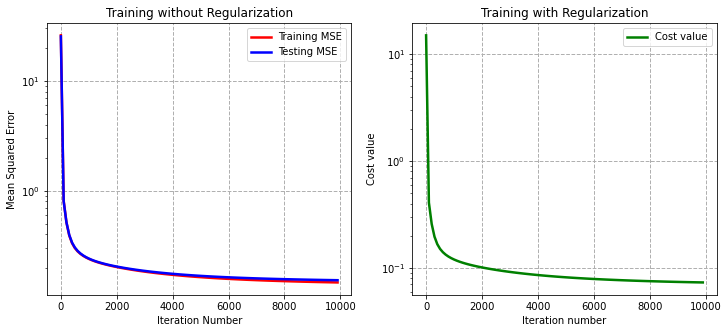

In [62]:
# training and testing accuracy visualization
fig = plt.figure(figsize=(12, 5))
(ax1, ax2) = fig.subplots(1, 2)

# figure 1 wiht axis 1
ax1.plot(record_iters, acc_train_list, color='r', linewidth=2.5, label='Training MSE')
ax1.plot(record_iters, acc_test_list, color='b', linewidth=2.5, label='Testing MSE')
ax1.set_yscale('log')
ax1.grid(linestyle='--', linewidth=1)
ax1.legend()
ax1.set_title('Training without Regularization')
ax1.set_xlabel('Iteration Number')
ax1.set_ylabel('Mean Squared Error');

# figure 2 wiht axis 2
ax2.plot(record_iters, cost_list, color='g', linewidth=2.5, label='Cost value')
ax2.set_yscale('log')
ax2.grid(linestyle='--', linewidth=1)
ax2.legend(loc='upper right')
ax2.set_title('Training with Regularization')
ax2.set_xlabel('Iteration number')
ax2.set_ylabel('Cost value');

#### 4.2.2. Learning parameters with regularization <a id='section_422'></a>
**Task 12:** <a id='task_12'></a> You task in this part is to:
1. compute current cost value (`regularized_cost_computation()`)
2. compute and update theta parameters with regularized gradient descent (`regularized_gradient_descent()`)

In [64]:
# learned parameters
regularized_theta = np.random.rand(n, 1)
lamda = 20
# record list
acc_train_list = list()
acc_test_list = list()
cost_list = list()
record_iters = list()

for k in range(num_iters):

    # Task 12:
    # ====================== START YOUR CODE HERE ======================
    # 1. compute current cost value
    # 2. compute and update theta parameters with regularized gradient descent
    cost = regularized_cost_computation(theta, x_train, y_train, lamda)
    regularized_theta = regularized_gradient_descent(theta, x_train, y_train, alpha, lamda)
    # ====================== END YOUR CODE HERE ======================

    if k % 100 == 0:
        acc_train = .0
        acc_test = .0

        acc_train = evaluation(regularized_theta, x_train, y_train)
        acc_test = evaluation(regularized_theta, x_test, y_test)

        acc_train_list.append(acc_train)
        acc_test_list.append(acc_test)
        cost_list.append(cost)
        record_iters.append(k)

        # print output
        print('Iteration {}: training MSE: {:.4f}, testing MSE: {:.4f}'.format(k, acc_train, acc_test))
    if cost < 1.0e-4:
        break

Iteration 0: training MSE: 0.1461, testing MSE: 0.1532
Iteration 100: training MSE: 0.1461, testing MSE: 0.1532
Iteration 200: training MSE: 0.1461, testing MSE: 0.1532
Iteration 300: training MSE: 0.1461, testing MSE: 0.1532
Iteration 400: training MSE: 0.1461, testing MSE: 0.1532
Iteration 500: training MSE: 0.1461, testing MSE: 0.1532
Iteration 600: training MSE: 0.1461, testing MSE: 0.1532
Iteration 700: training MSE: 0.1461, testing MSE: 0.1532
Iteration 800: training MSE: 0.1461, testing MSE: 0.1532
Iteration 900: training MSE: 0.1461, testing MSE: 0.1532
Iteration 1000: training MSE: 0.1461, testing MSE: 0.1532
Iteration 1100: training MSE: 0.1461, testing MSE: 0.1532
Iteration 1200: training MSE: 0.1461, testing MSE: 0.1532
Iteration 1300: training MSE: 0.1461, testing MSE: 0.1532
Iteration 1400: training MSE: 0.1461, testing MSE: 0.1532
Iteration 1500: training MSE: 0.1461, testing MSE: 0.1532
Iteration 1600: training MSE: 0.1461, testing MSE: 0.1532
Iteration 1700: training M

Visualization of learning process based on mean squared errors

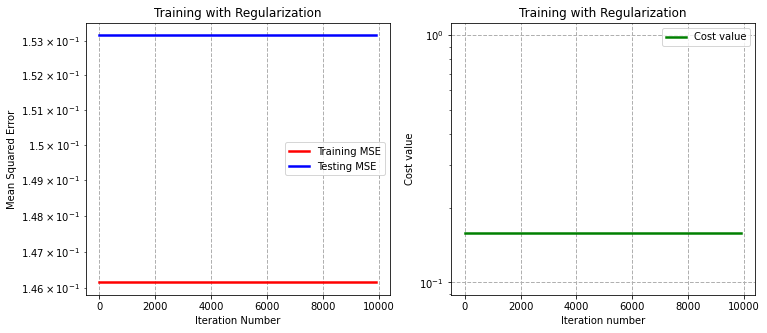

In [65]:
# training and testing accuracy visualization
fig = plt.figure(figsize=(12, 5))
(ax1, ax2) = fig.subplots(1, 2)

ax1.plot(record_iters, acc_train_list, color='r', linewidth=2.5, label='Training MSE')
ax1.plot(record_iters, acc_test_list, color='b', linewidth=2.5, label='Testing MSE')
ax1.set_yscale('log')
ax1.grid(linestyle='--', linewidth=1)
ax1.legend()
ax1.set_title('Training with Regularization')
ax1.set_xlabel('Iteration Number')
ax1.set_ylabel('Mean Squared Error');

# figure 2 wiht axis 2
ax2.plot(record_iters, cost_list, color='g', linewidth=2.5, label='Cost value')
ax2.set_yscale('log')
ax2.grid(linestyle='--', linewidth=1)
ax2.legend(loc='upper right')
ax2.set_title('Training with Regularization')
ax2.set_xlabel('Iteration number')
ax2.set_ylabel('Cost value');

## 5. Prediction of Sampled Data <a id='section_5'></a>
To show the prediction effect of the learned parameters more intuitively, several sampled data items in the testing dataset are used to predict the price of the used car. The data properties, real prices, and the predicted prices are listed in the following table.

### 5.1 MAPE Evaluation <a id='section_51'></a>

You will implement the Mean Absolute Percentage Error (MAPE) function to evaluate the parameters.
$$
\text{MAPE}(\theta) = \frac{1}{m} \sum_{i=1}^m \left| \frac{h_{\theta}(x^{(i)}) - y^{(i)}}{y^{(i)}} \right| \times 100 \ . \tag{9}
$$

**Task 13:** <a id='task_13'></a> In this task, you will:
1. Compute the hypothesis $h_{\theta}(x)$.
2. Compute the absolute percentage errors between the hypothesis $h_{\theta}(x^{(i)})$ and the actual values $y^{(i)}$ with the formula $\frac{h_{\theta}(x^{(i)}) - y^{(i)}}{y^{(i)}} \times 100$, saved in "abs_percentage_errors".
3. Compute the mean of the absolute percentage errors according to Equation (9).


In [66]:
def mean_absolute_percentage_error(theta, x, y):
    """
    Evaluates the mean absolute percentage error.

    Parameters
    ----------
    theta : array_like
        Initial values for the linear regression parameters.
        A vector of shape (n+1, 1).

    x : array_like
        The input dataset of shape (m, n+1).

    y : array_like
        Value at given features. A vector of shape (m, 1).

    Returns
    -------
    mape : float
        The mean absolute percentage error.
    """

    m = x.shape[0]  # Number of examples
    mape = 0.0

    # Task 11:
    # ====================== START YOUR CODE HERE ======================
    hyp = np.dot(x,theta)
    abs_percentage_errors = np.abs((hyp-y) / y) *100
    mape = np.mean(abs_percentage_errors)
    # ====================== END YOUR CODE HERE ======================

    return mape


**[Test Block 10]:** Test code for function `mean_absolute_percentage_error()`.

In [67]:
demo_theta = np.array([[1], [2], [3]])  # shape (3, 1)
demo_x = np.array([[1, 2, 3]])  # shape (1, 3)
demo_y = np.array([[16]])  # shape (1, 1)

mape = mean_absolute_percentage_error(demo_theta, demo_x, demo_y)
print('Mean Absolute Percentage Error: {:.2f}%'.format(mape))

if np.isclose(mape, 12.5, atol=1e-2):
    print('Your answers are correct!')
else:
    print('*** Error! Your answers are not correct. Please correct your code. ***')

Mean Absolute Percentage Error: 12.50%
Your answers are correct!


### 5.2 Prediction of Sampled Data <a id='section_52'></a>

After ensuring that students can compute MAPE correctly with this setup, the next step involves integrating it into the sampled data evaluation and visualization as shown before.

In [68]:
# Prediction of Sampled Data <a id='section_5'></a>

# Generate random data items from the testing dataset
random_idx = np.random.randint(0, x_test.shape[0], size=5)
sample_x_test = x_test[random_idx, :]
sample_y_test = y_test[random_idx, :]

# Sampled data visualization
raw_sample_data = pd.DataFrame(inverse_scale_feature(sample_x_test[:, 1:], scaling_parameters, method='min_max'), columns=data.columns)
raw_sample_data['Real_Price'] = np.exp(sample_y_test)

# Get the hypothesis output without and with regularization
hypothesis_output_01 = np.array(hypothesis(theta, sample_x_test), dtype=float)
pred_y_test_01 = np.exp(hypothesis_output_01)

hypothesis_output_02 = np.array(hypothesis(regularized_theta, sample_x_test), dtype=float)
pred_y_test_02 = np.exp(hypothesis_output_02)

raw_sample_data['Predicted_Price_01'] = pred_y_test_01  # without regularization
raw_sample_data['Predicted_Price_02'] = pred_y_test_02  # with regularization

# Evaluation of the model with MAPE for the sampled data
mape_01 = mean_absolute_percentage_error(theta, sample_x_test, sample_y_test)
mape_02 = mean_absolute_percentage_error(regularized_theta, sample_x_test, sample_y_test)

print("MAPE without regularization: {:.2f}%".format(mape_01))
print("MAPE with regularization: {:.2f}%".format(mape_02))

# Add MAPE to the data visualization
raw_sample_data['MAPE_01'] = mape_01
raw_sample_data['MAPE_02'] = mape_02

raw_sample_data.head()

MAPE without regularization: 5.48%
MAPE with regularization: 5.47%


,Miles_Driven,Seats,Fuel_Consumption(mpg),Engine(CC),Power(bhp),Location_Atlanta,Location_Austin,Location_Boston,Location_Charlotte,Location_Chicago,...,Company_RAM,Company_RENAULT,Company_TESLA,Company_TOYOTA,Company_VOLKSWAGEN,Real_Price,Predicted_Price_01,Predicted_Price_02,MAPE_01,MAPE_02
0,23613.0,5.0,37.0,1196.0,70.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7100.0,8186.290891,8180.520499,5.476002,5.47394
1,23614.0,5.0,48.0,1197.0,78.9,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4300.0,5982.475963,5978.363531,5.476002,5.47394
2,52819.0,5.0,25.0,1796.0,157.7,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11000.0,15787.530286,15775.337315,5.476002,5.47394
3,57992.0,5.0,40.0,1968.0,138.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,28900.0,8890.600092,8884.323350,5.476002,5.47394
4,10564.0,5.0,45.0,2494.0,158.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,64000.0,31283.632482,31258.404665,5.476002,5.47394


## 6. Linear Regression using scikit-learn <a id='section_6'></a>
This part of the exercise involves training a linear regression model using the scikit-learn library to provide a benchmark against our custom implementation. This section does not explicitly contribute to the marks but is essential for comparative evaluation.

**Task 14:** <a id='task_14'></a> You are to:

1. Calculate the Mean Squared Error (MSE) for the predictions.
2. Print the calculated MSE.
3. Calculate the Mean Absolute Percentage Error (MAPE) for the predictions.
4. Print the calculated MAPE.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Initialize the model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(x_train[:, 1:], y_train)

# Predict on the testing dataset
y_pred_sklearn = lr_model.predict(x_test[:, 1:])  # Consistency maintained

# Task 14:
# ====================== START YOUR CODE HERE ======================
# Calculate MSE for the predictions
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
# Print the MSE
print("MSE using scikit-learn Linear Regression: {:.4f}".format(mse_sklearn))

# Calculate MAPE for the predictions
mape_sklearn = mean_absolute_percentage_error(y_test, y_pred_sklearn)
# Print the MAPE
print("MAPE using scikit-learn Linear Regression: {:.2f}%".format(mape_sklearn))
# ====================== END YOUR CODE HERE ======================


MSE using scikit-learn Linear Regression: 0.1506
MAPE using scikit-learn Linear Regression: 0.03%
